<a href="https://colab.research.google.com/github/TannaPrasanthkumar/EDA-on-Electric-Vehicles/blob/main/Data_Analysis_on_Electric_Vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [ ]:
df = pd.read_csv("/content/dataset (1).csv")

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [ ]:
df.rename(columns={'County': 'Country'}, inplace=True)

In [ ]:
df.isna().sum()

,0
VIN (1-10),0
Country,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
df.Model.unique()

array(['RAV4 PRIME', 'VOLT', 'LEAF', 'BOLT EV', 'FUSION', 'MODEL 3',
       'SOUL', 'Q5 E', 'MODEL X', '500', 'X5', '530E', 'TAYCAN', 'X3',
       'A3', 'SOUL EV', 'C-MAX', 'MODEL S', 'F-150', 'CT6', 'I3',
       'CLARITY', 'MODEL Y', 'NIRO', 'OUTLANDER', 'PACIFICA', 'R1T',
       'KONA ELECTRIC', 'XC40', 'ID.4', 'PRIUS PLUG-IN', 'MUSTANG MACH-E',
       'EQB-CLASS', 'E-GOLF', 'PRIUS PRIME', 'C40', 'SORENTO', 'XC60',
       'CAYENNE', 'WRANGLER', 'COUNTRYMAN', 'S60', 'EV6',
       'FORTWO ELECTRIC DRIVE', 'GRAND CHEROKEE', '330E', 'CROSSTREK',
       'IONIQ 5', 'IONIQ', 'E-TRON', 'ROADSTER', 'KONA', 'XC90', 'SPARK',
       'PS2', 'A7', 'HARDTOP', 'ESCAPE', 'LUCID AIR', 'E-TRON SPORTBACK',
       'Q5', 'RAV4', 'AVIATOR', 'E-TRON GT', 'EDV', 'IX', 'FORTWO',
       'I-PACE', 'SANTA FE', 'B-CLASS', 'KARMA', 'I4', 'OPTIMA',
       'GLC-CLASS', 'Q4', 'SONATA', 'EQ FORTWO', 'FOCUS',
       'RANGE ROVER SPORT', 'TRANSIT', 'PANAMERA', 'I8', 'BOLT EUV',
       'CORSAIR', 'ELR', 'GLE-CLASS', 'V60

In [ ]:
df.Model.value_counts()

,count
Model,
MODEL 3,23135
MODEL Y,17142
LEAF,12880
MODEL S,7377
BOLT EV,4910
...,...
745LE,2
S-10 PICKUP,1
SOLTERRA,1


In [ ]:
df["Model"].fillna(df.Model.mode()[0], inplace=True)

<ipython-input-9-a49530ef5eaf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Model"].fillna(df.Model.mode()[0], inplace=True)


In [ ]:
df.Model.isna().sum()

0

In [ ]:
df["Legislative District"].isna().sum()

286

In [ ]:
df["Legislative District"].value_counts()

,count
Legislative District,
41.0,7605
45.0,7112
48.0,6462
36.0,5251
46.0,4723
1.0,4715
5.0,4694
43.0,4621
37.0,3556


In [ ]:
df["Legislative District"].fillna(df["Legislative District"].mode()[0], inplace=True)

<ipython-input-13-53e925395070>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Legislative District"].fillna(df["Legislative District"].mode()[0], inplace=True)


In [ ]:
df["Legislative District"].isna().sum()

0

In [ ]:
df["Vehicle Location"].value_counts()

,count
Vehicle Location,
POINT (-122.13158 47.67858),2916
POINT (-122.2066 47.67887),2059
POINT (-122.1872 47.61001),2001
POINT (-122.31765 47.70013),1880
POINT (-122.12096 47.55584),1852
...,...
POINT (-124.33152 48.05431),1
POINT (-77.41203 39.41574),1
POINT (-123.61022 46.35588),1


In [ ]:
df["Vehicle Location"].fillna(df["Vehicle Location"].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

,0
VIN (1-10),0
Country,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
df["Electric Utility"].isna().sum()

443

In [ ]:
df["Electric Utility"].value_counts()

,count
Electric Utility,
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),40247
PUGET SOUND ENERGY INC,22172
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),21447
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA),6522
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY,5053
...,...
BONNEVILLE POWER ADMINISTRATION||PENINSULA LIGHT COMPANY,1
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY,1
CITY OF SEATTLE - (WA),1


In [ ]:
df["Electric Utility"].fillna(df["Electric Utility"].mode()[0], inplace=True)

<ipython-input-20-e6a1751f1bc5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Electric Utility"].fillna(df["Electric Utility"].mode()[0], inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   Country                                            112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112634 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

# univariate Analysis

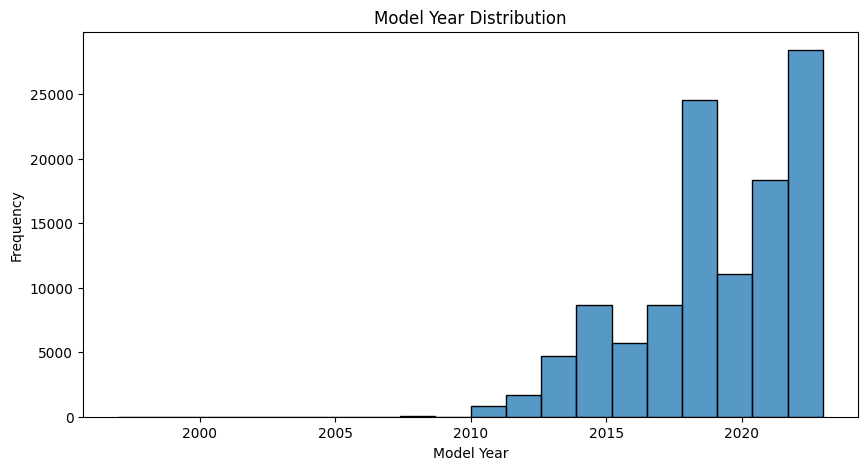

In [ ]:
# 1. Model Year Distribution

plt.figure(figsize=(10, 5))
sns.histplot(df['Model Year'], bins=20, kde=False)
plt.title('Model Year Distribution')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

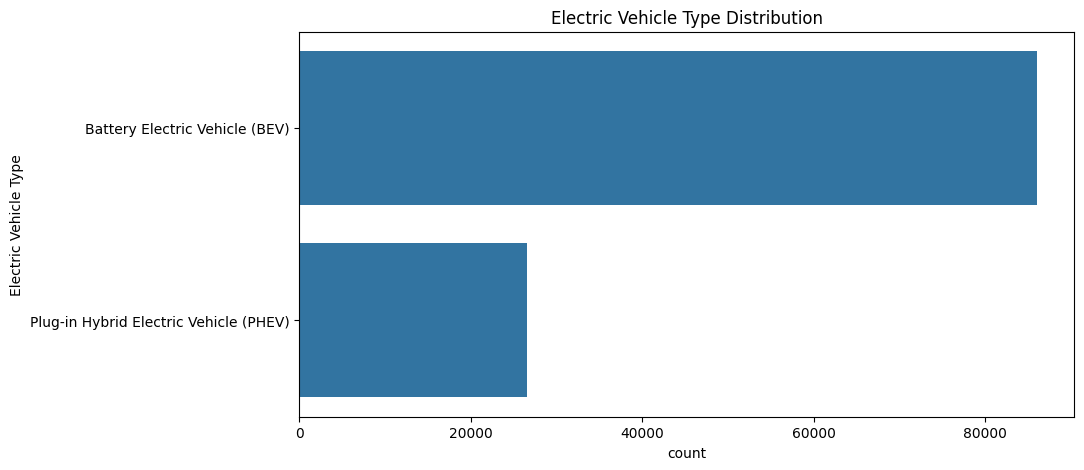

In [ ]:
# 2. Electric Vehicle Type Distribution

plt.figure(figsize=(10, 5))
sns.countplot(y='Electric Vehicle Type', data=df, order=df['Electric Vehicle Type'].value_counts().index)
plt.title('Electric Vehicle Type Distribution')
plt.show()

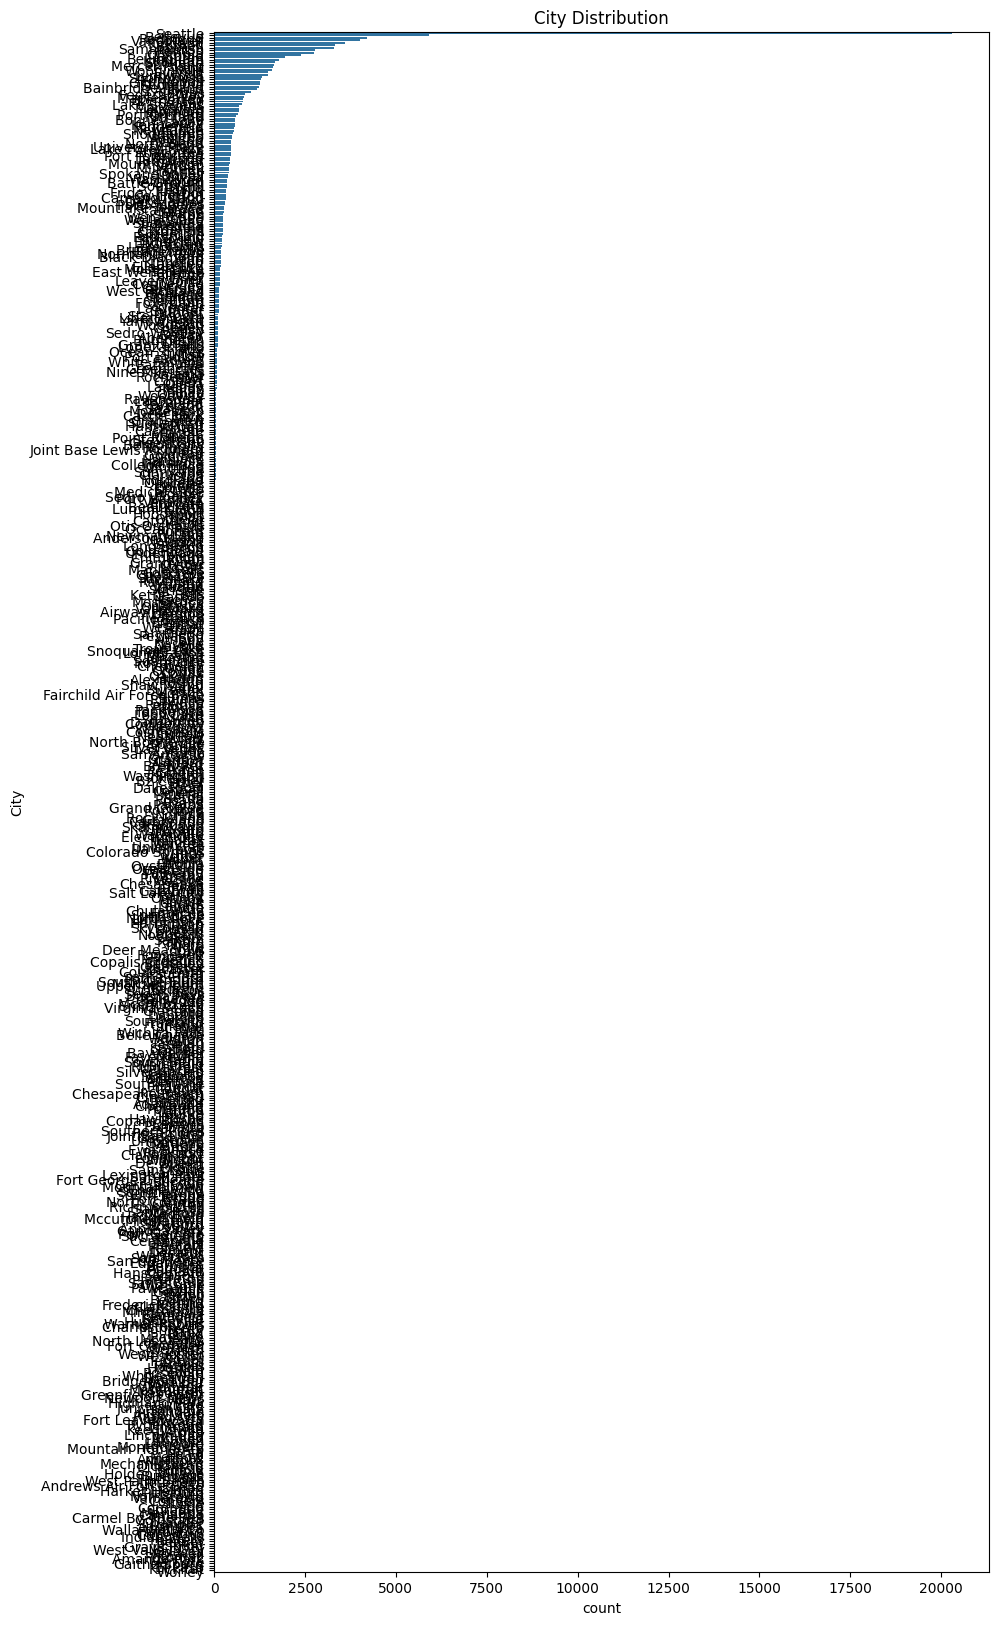

In [ ]:
# 3. City Distribution

plt.figure(figsize=(10, 20))
sns.countplot(y='City', data=df, order=df['City'].value_counts().index)
plt.title('City Distribution')
plt.yticks(rotation=0)
plt.show()


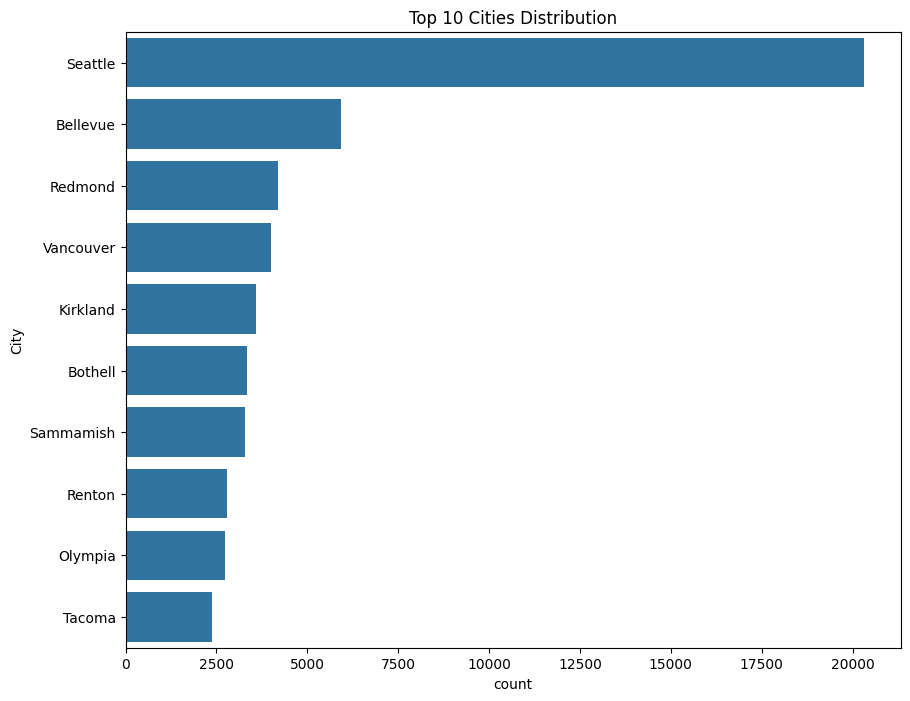

In [ ]:
# 4. Top 10 cities distribution

top_cities = df['City'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 8))
sns.countplot(y='City', data=df[df['City'].isin(top_cities)], order=top_cities)
plt.title('Top 10 Cities Distribution')
plt.show()

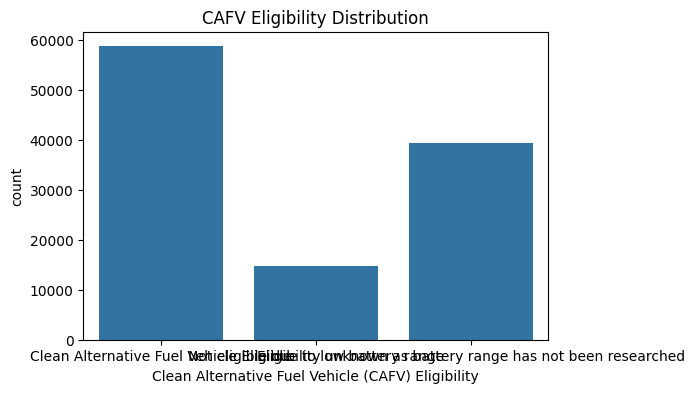

In [ ]:
# 5. Clean Alternative Fuel Vehicle (CAFV) Eligibility Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=df)
plt.title('CAFV Eligibility Distribution')
plt.show()

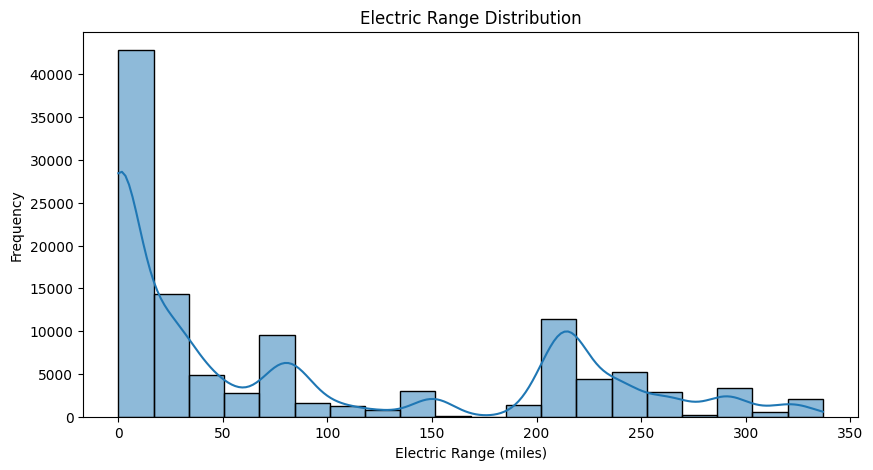

In [ ]:
# 6. Electric Range Distribution

plt.figure(figsize=(10, 5))
sns.histplot(df['Electric Range'], bins=20, kde=True)
plt.title('Electric Range Distribution')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

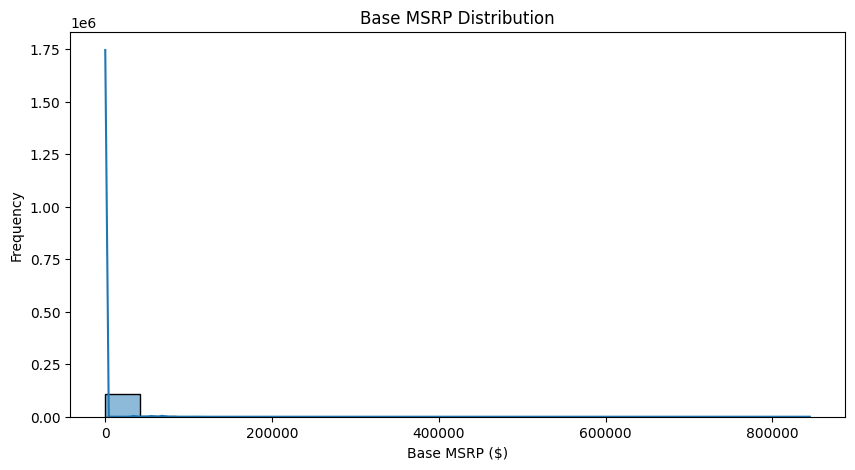

In [ ]:
# 7. Base MSRP Distribution

plt.figure(figsize=(10, 5))
sns.histplot(df['Base MSRP'], bins=20, kde=True)
plt.title('Base MSRP Distribution')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Frequency')
plt.show()

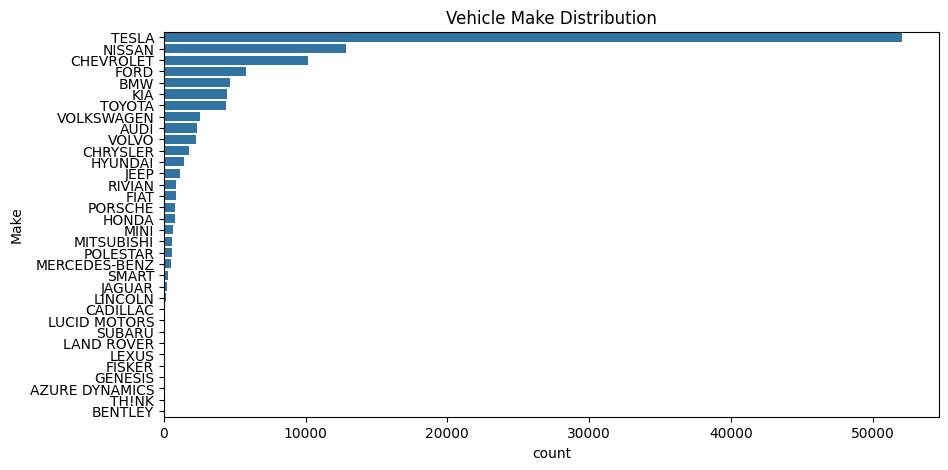

In [ ]:
# 8. Count of Vehicle Makes

plt.figure(figsize=(10, 5))
sns.countplot(y='Make', data=df, order=df['Make'].value_counts().index)
plt.title('Vehicle Make Distribution')
plt.show()

# Bivariate Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   Country                                            112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112634 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

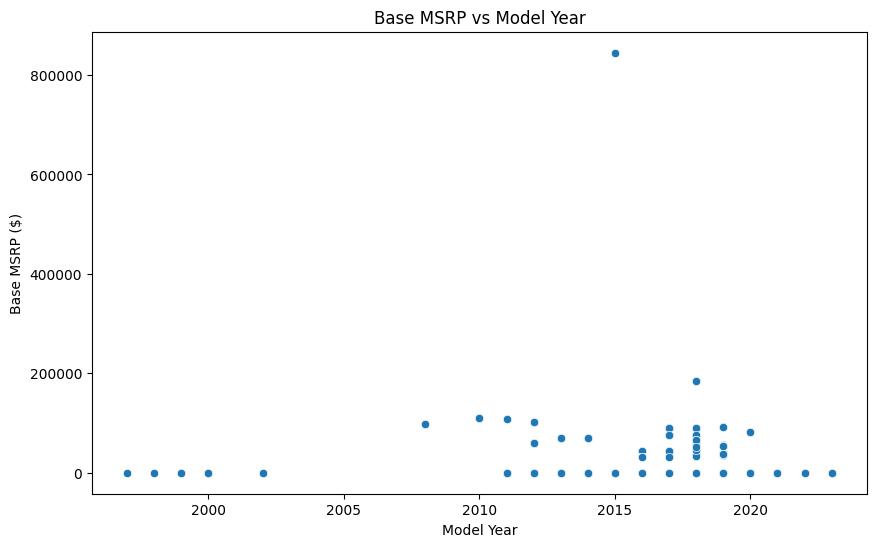

In [ ]:
# 1. Base MSRP vs. Model Year

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Model Year', y='Base MSRP', data=df)
plt.title('Base MSRP vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Base MSRP ($)')
plt.show()

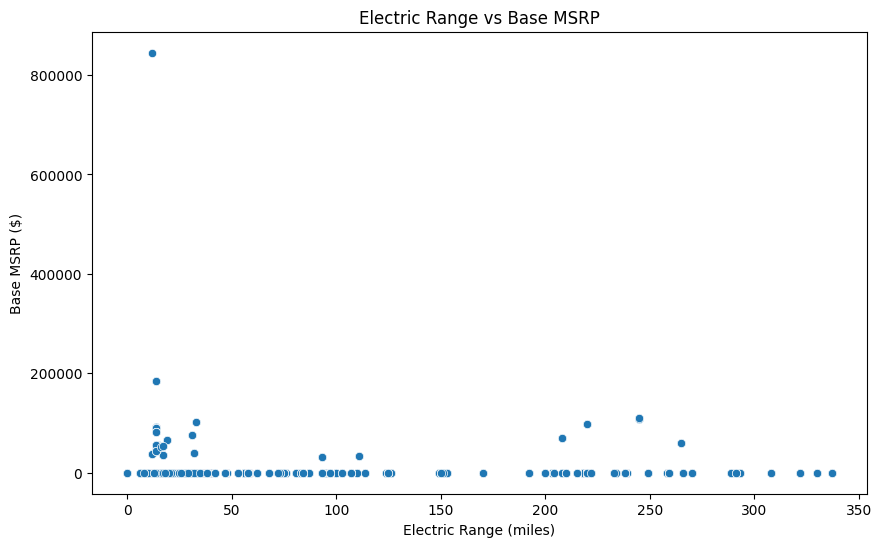

In [ ]:
# 2. Electric Range vs. Base MSRP (Scatter Plot)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=df)
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.show()

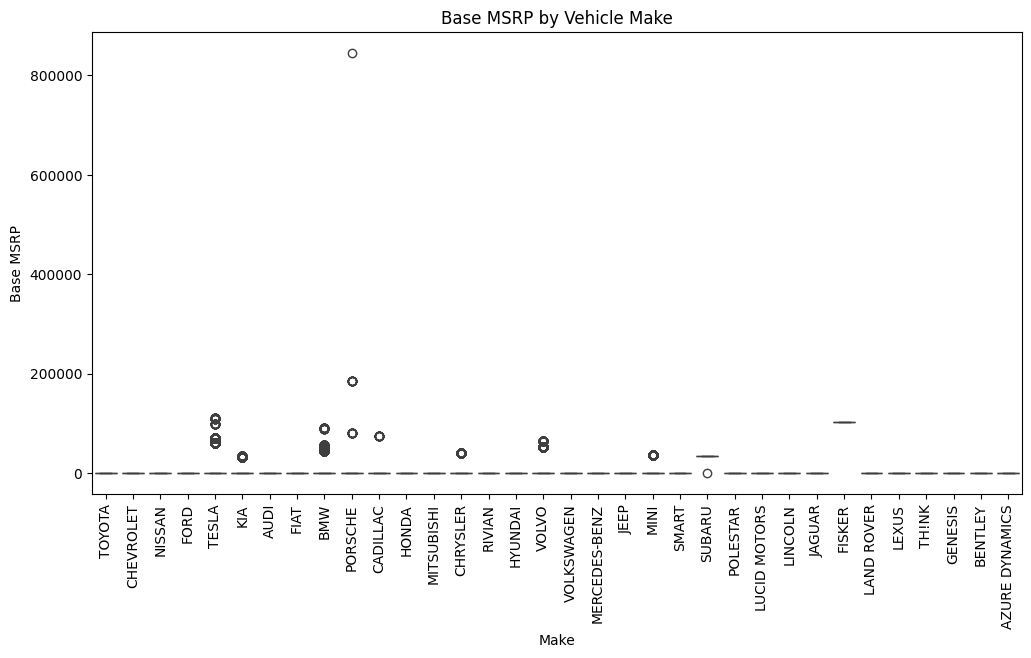

In [ ]:
# 3. Make vs. Base MSRP (Box Plot)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Base MSRP', data=df)
plt.title('Base MSRP by Vehicle Make')
plt.xticks(rotation=90)
plt.show()

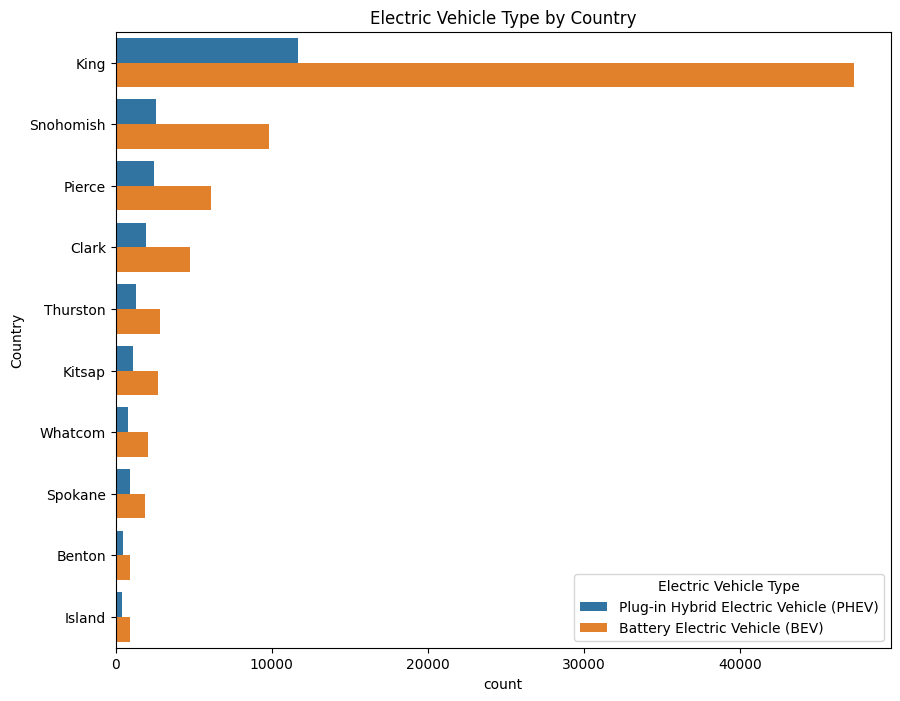

In [ ]:
# 4. Count of Electric Vehicle Types per County

plt.figure(figsize=(10, 8))
sns.countplot(y='Country', hue='Electric Vehicle Type', data=df, order=df['Country'].value_counts().index[:10])  # Top 10 counties
plt.title('Electric Vehicle Type by Country')
plt.show()

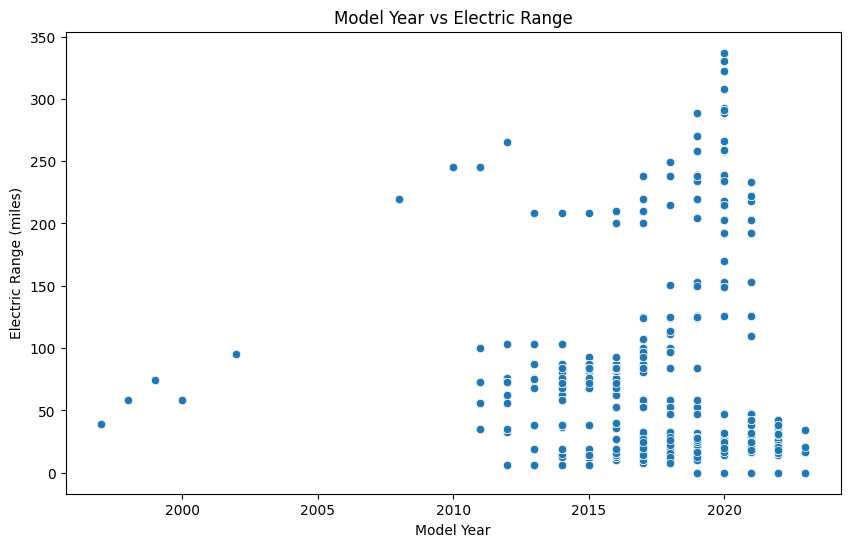

In [ ]:
# 5. Model Year vs Electric Range (Scatter Plot)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Model Year', y='Electric Range', data=df)
plt.title('Model Year vs Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.show()

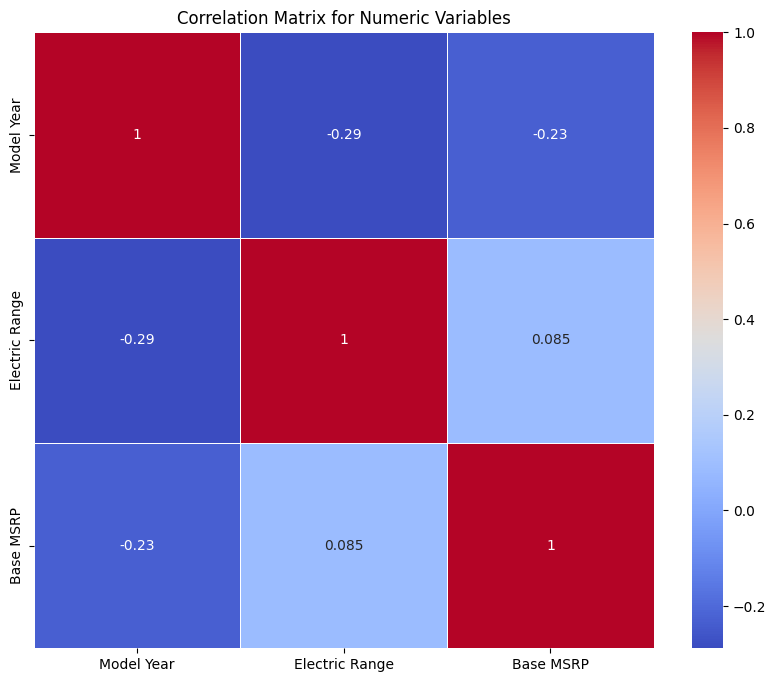

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Model Year', 'Electric Range', 'Base MSRP']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numeric Variables')
plt.show()

In [ ]:
!pip install plotly

In [ ]:
df.columns

Index(['VIN (1-10)', 'Country', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

# Number of EV vehicles based on location

In [ ]:

country_by_ev_count = df.groupby('Vehicle Location').size().reset_index(name='EV_count')

fig = px.choropleth(country_by_ev_count,
                    locations='Vehicle Location',
                    locationmode='country names',
                    hover_name='Vehicle Location',
                    color='EV_count',
                    title='Number of EV Vehicles by Location',
                    animation_frame='EV_count',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


In [ ]:
state_by_ev_count = df.groupby('Country').size().reset_index(name='EV_count')

fig = px.choropleth(state_by_ev_count,
                    locations='Country',
                    locationmode='USA-states',
                    hover_name='State',
                    color='EV_count',
                    scope="usa",
                    title='Number of EV Vehicles by State',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [ ]:

country_by_ev_count = df.groupby('Country').size().reset_index(name='EV_count')

fig = px.choropleth(country_by_ev_count,
                    locations='Country',
                    locationmode='country names',
                    hover_name='Country',
                    color='EV_count',
                    title='Number of EV Vehicles by Location',
                    animation_frame='EV_count',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [ ]:


# Group by Postal Code and count EVs
ev_by_location = df.groupby('Postal Code').size().reset_index(name='EV_count')

# Ensure Postal Code is string
ev_by_location['Postal Code'] = ev_by_location['Postal Code'].astype(str)

# Create the choropleth map
fig = px.choropleth(
    ev_by_location,
    geojson="https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json",
    locations='Postal Code',
    featureidkey="properties.ZCTA5CE10",
    color='EV_count',
    hover_name='Postal Code',
    title='Number of EV Vehicles by Zip Code in Washington State',
    color_continuous_scale=px.colors.sequential.Plasma
)

# Update the map to focus on Washington State
fig.update_geos(
    visible=False,
    scope="usa",
    center=dict(lat=47.7511, lon=-120.7401),
    projection_scale=6
)

fig.update_layout(height=800, width=1000)

fig.show()

In [ ]:
!pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.1 MB/s eta 0:00:00


In [ ]:
import bar_chart_race as bcr

In [ ]:
df['Model Year'] = pd.to_datetime(df['Model Year'], format='%Y')
ev_sales = df.groupby(['Make', 'Model Year']).size().reset_index(name='Sales')
final = ev_sales.pivot(index='Make', columns='Model Year', values='Sales')
final = final.fillna(0)
final = final.sort_index(axis=1)
top_makers = final.sum(axis=1).nlargest(10).index
final = final.loc[top_makers]
final = final.loc[:, '2015':'2024']
print(final.head())

Model Year  2015-01-01  2016-01-01  2017-01-01  2018-01-01  2019-01-01  \
Make                                                                     
TESLA           1089.0      1639.0      1679.0      7919.0      4583.0   
NISSAN          1839.0      1208.0       934.0      1232.0      1409.0   
CHEVROLET        467.0       309.0      2744.0      1126.0       966.0   
FORD             556.0       778.0       659.0       170.0       136.0   
BMW              403.0       383.0       692.0       710.0       279.0   

Model Year  2020-01-01  2021-01-01  2022-01-01  2023-01-01  
Make                                                        
TESLA           7018.0     11028.0     14548.0       890.0  
NISSAN           580.0       534.0       970.0       149.0  
CHEVROLET       1014.0       377.0       892.0       177.0  
FORD              65.0       882.0      1250.0         4.0  
BMW              143.0       635.0       905.0        73.0  


In [ ]:
!pip install --upgrade bar_chart_race

In [ ]:
import bar_chart_race as bcr

print(bcr.__version__)

0.1.0


In [ ]:
bcr.bar_chart_race(
    # must be a DataFrame where each row represents a single period of time.
    df=final,


    # name of the output video file
    filename="final.mp4",


    # specify location of image folder
    #img_label_folder="bar_image_labels",


    # change the Figure properties



    # orientation of the bar: h or v
    orientation="h",


    # sort the bar for each period
    sort="desc",


    # number of bars to display in each frame
    n_bars=10,

    fixed_order=False,

    # to fix the maximum value of the axis
    fixed_max=True,


    # smoothness of the animation
    steps_per_period=45,


    # time period in ms for each row
    period_length=3000,


    # custom set of colors
    # title and its styles
    title={'label': 'Year wise sales of each Makers from last decade',
           'size': 52,
           'weight': 'bold',
           'pad': 40
           },


    # adjust the position and style of the period label
    period_label={'x': .95, 'y': .15,
                  'ha': 'right',
                  'va': 'center',
                  'size': 72,
                  'weight': 'semibold'
                  },


    # style the bar label text
    # bar_label_font_size=14,


    # style the labels in x and y axis
    # tick_label_font_size=14,


    # adjust the style of bar
    # alpha is opacity of bar
    # ls - width of edge
    bar_kwargs={'alpha': .99, 'lw': 0},


    # adjust the bar label format
    # bar_texttemplate='{x:.2f}',


    # adjust the period label format
    # period_template='{x:.0f}',
)


/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



In [ ]:

bcr.bar_chart_race(
    df=final,
    filename="ev_sales_by_maker.mp4",
    fig_kwargs={
        'figsize': (16, 9),
        'dpi': 120,
        'facecolor': '#F8FAFF'
    },
    orientation="h",
    sort="desc",
    n_bars=8,  # Adjust based on how many makers you want to show
    steps_per_period=45,
    period_length=1000,
    colors=[
        '#FFA500', '#00FFFF', '#008000', '#FF0000', '#FFC0CB', '#0000FF', '#800080', '#FF69B4'
    ],
    title={
        'label': 'Year wise sales of each Makers from last decade',
        'size': 24,
        'weight': 'bold',
        'pad': 20
    },
    period_label={
        'x': .95, 'y': .15,
        'ha': 'right',
        'va': 'center',
        'size': 36,
        'weight': 'semibold'
    },
    bar_label_font={'size': 14},
    tick_label_font={'size': 14},
    bar_kwargs={'alpha': .99, 'lw': 0},
    bar_texttemplate='{x:.2f}',
    period_template='{x:.0f}',
    period_summary_func=lambda v, r: {'x': .98, 'y': .05,
                                      's': f'Total: {v.sum():.0f}',
                                      'ha': 'right', 'size': 14},
)

In [ ]:
print(bcr.__version__)

0.1.0


In [ ]:
bcr.bar_chart_race(
    df=final,
    filename="ev_sales_by_maker.mp4",
    orientation="h",
    sort="desc",
    n_bars=8,
    steps_per_period=30,
    period_length=1000,
    title="Year-wise sales of each Maker from last decade",
    bar_size=.95,
    figsize=(16, 9),
    dpi=144,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt="%Y",
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total: {v.sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    bar_label_font={'size': 7},
    tick_label_font={'size': 7},
    scale='linear',
    bar_kwargs={'alpha': .99},
    filter_column_colors=True
)

TypeError: bar_chart_race() got an unexpected keyword argument 'bar_label_font'